In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [1]:
pip install gspread

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gspread-dataframe

Note: you may need to restart the kernel to use updated packages.


In [32]:
train_test_path = '../EVAC-master/Data/train_test.csv'


In [9]:
poi_df = pd.read_csv('../EVAC-master/Data/Points_of_Interest.csv')

# Point of Interest Data Code

In [10]:
poi_df.head()

,X,Y,OBJECTID,COLS_KEY,LSN,POI_NAME,POI_TYPE,POI_SOURCE,PRIMARY,ALT_GEOM,PHONE_NUM,GLOBALID,WEBSITE,OB_GYN,PEDIATRICS,PRIMARY_CARE
0,-83.112629,40.006321,5787325,626098.0,3750 ZANE TRACE DR,Pet Brands,Industrial - Warehouse,NaN,Yes,Yes,NaN,{2D626609-391A-4BB2-B33E-DEF58FD576EE},NaN,NaN,NaN,NaN
1,-83.059869,40.052299,5787326,586262.0,1520 OLD HENDERSON RD,The Breathing Association,Medical - Other,NaN,No,Yes,614-457-4570,{2397A8D6-753F-4D01-A40A-E1B5E940CD92},http://www.breathingassociation.org/,NaN,NaN,NaN
2,-82.978142,40.061762,5787327,811713.0,4661 KARL RD,Fresenius Kidney Care Central Ohio Dialysis,Medical - Other,NaN,Yes,Yes,6148400012,{24AF2DF8-3221-43B5-A611-7768F1EB201E},NaN,NaN,NaN,NaN
3,-82.994076,39.952413,5787328,233764.0,500 S 4TH ST 1,Advanced Auto Insurance Network,Office - Corporate,NaN,Yes,Yes,NaN,{61040209-31C6-4035-B835-80DAE70BB4BC},NaN,NaN,NaN,NaN
4,-83.012750,39.956807,5787329,589438.0,185 MCDOWELL ST,All American Welding,Retail - Services,NaN,Yes,Yes,NaN,{2B36E5A7-8F4B-464D-9D49-8E053AFB321C},NaN,NaN,NaN,NaN


In [11]:
poi_df.shape

(14619, 16)

In [12]:
poi_df.columns

Index(['X', 'Y', 'OBJECTID', 'COLS_KEY', 'LSN', 'POI_NAME', 'POI_TYPE',
       'POI_SOURCE', 'PRIMARY', 'ALT_GEOM', 'PHONE_NUM', 'GLOBALID', 'WEBSITE',
       'OB_GYN', 'PEDIATRICS', 'PRIMARY_CARE'],
      dtype='object')

In [13]:
poi_df.isnull().sum()

X                   1
Y                   1
OBJECTID            0
COLS_KEY          361
LSN                82
POI_NAME            8
POI_TYPE            8
POI_SOURCE      12914
PRIMARY             2
ALT_GEOM            0
PHONE_NUM       12615
GLOBALID            0
WEBSITE         14076
OB_GYN          14517
PEDIATRICS      14526
PRIMARY_CARE    14481
dtype: int64

In [14]:
poi_df = poi_df.drop(['POI_SOURCE', 'WEBSITE', 'OB_GYN', 'PEDIATRICS', 'PRIMARY_CARE'], axis=1)

In [15]:
poi_df.isnull().sum()

X                1
Y                1
OBJECTID         0
COLS_KEY       361
LSN             82
POI_NAME         8
POI_TYPE         8
PRIMARY          2
ALT_GEOM         0
PHONE_NUM    12615
GLOBALID         0
dtype: int64

In [7]:
poi_df.head()

,X,Y,OBJECTID,COLS_KEY,LSN,POI_NAME,POI_TYPE,PRIMARY,ALT_GEOM,PHONE_NUM,GLOBALID
0,-83.112629,40.006321,5787325,626098.0,3750 ZANE TRACE DR,Pet Brands,Industrial - Warehouse,Yes,Yes,NaN,{2D626609-391A-4BB2-B33E-DEF58FD576EE}
1,-83.059869,40.052299,5787326,586262.0,1520 OLD HENDERSON RD,The Breathing Association,Medical - Other,No,Yes,614-457-4570,{2397A8D6-753F-4D01-A40A-E1B5E940CD92}
2,-82.978142,40.061762,5787327,811713.0,4661 KARL RD,Fresenius Kidney Care Central Ohio Dialysis,Medical - Other,Yes,Yes,6148400012,{24AF2DF8-3221-43B5-A611-7768F1EB201E}
3,-82.994076,39.952413,5787328,233764.0,500 S 4TH ST 1,Advanced Auto Insurance Network,Office - Corporate,Yes,Yes,NaN,{61040209-31C6-4035-B835-80DAE70BB4BC}
4,-83.012750,39.956807,5787329,589438.0,185 MCDOWELL ST,All American Welding,Retail - Services,Yes,Yes,NaN,{2B36E5A7-8F4B-464D-9D49-8E053AFB321C}


In [16]:
zeros = ['Emergency', 'Medical', 'Industrial']
ones = ['Government', 'Group Quarters', 'Education']
twos = ['Transportation', 'Public Places', 'Retail', 'Office']

In [17]:
poi = poi_df[['X', 'Y', 'POI_TYPE']].copy()

In [18]:
poi.head()

,X,Y,POI_TYPE
0,-83.112629,40.006321,Industrial - Warehouse
1,-83.059869,40.052299,Medical - Other
2,-82.978142,40.061762,Medical - Other
3,-82.994076,39.952413,Office - Corporate
4,-83.012750,39.956807,Retail - Services


In [19]:
poi['POI_TYPE'].value_counts()

Retail - Commercial/Retail           2688
Retail - Restaurant                  2405
Retail - Services                    2384
Office - Corporate                   1291
Public Places - House of Worship      645
                                     ... 
Public Places - Convention Center       3
Government - Prison/Correctional        3
Industrial - Quarry                     2
Public Places - Fairgrounds             1
Emergency Response - Other              1
Name: POI_TYPE, Length: 73, dtype: int64

In [20]:
poi['POI_TYPE'].unique()

array(['Industrial - Warehouse', 'Medical - Other', 'Office - Corporate',
       'Retail - Services', 'Education - Elementary',
       'Industrial - Water Treatment Plant', 'Office - Non-Profit',
       'Retail - Commercial/Retail', 'Public Places - House of Worship',
       'Retail - Shopping Center-Neighborhood', 'Retail - Gas Station',
       'Retail - Restaurant', 'Retail - Shopping Center-Community',
       'Transportation - Parking Lot/Garage', 'Education - High',
       'Education - College/University', 'Group Quarters - Dormitory',
       "Medical - Women's Health", 'Medical - Physician',
       'Medical - Research/Laboratory', 'Transportation - Bus',
       'Medical - Dental', 'Medical - Veterinary',
       'Emergency Response - Police', 'Transportation - Other',
       'Public Places - Community/Recreation Center',
       'Retail - Specialty Food', 'Education - Other',
       'Retail - Fitness Center', 'Retail - Mixed Use',
       'Public Places - Arena/Stadium',
       'Medi

In [21]:
# match all strings = 'category - subcategory' and remove the part immediately following the
# '-' to end with 'category'

new_poi = poi.replace(to_replace=r' - .*', value='', regex=True)

In [23]:
new_poi['POI_TYPE'].unique()

array(['Industrial', 'Medical', 'Office', 'Retail', 'Education',
       'Public Places', 'Transportation', 'Group Quarters',
       'Emergency Response', 'Government', nan], dtype=object)

In [25]:
new_poi['Classification'] = new_poi['POI_TYPE']
new_poi['Classification'].replace({'Emergency': 0, 'Medical': 0, 'Industrial': 0, 'Government': 1, 
                                             'Group Quarters': 1, 'Education': 1, 'Transportation': 2, 
                                             'Public Places': 2, 'Retail': 2, 'Office': 2}, inplace=True)


In [26]:
new_poi.head()

,X,Y,POI_TYPE,Classification
0,-83.112629,40.006321,Industrial,0
1,-83.059869,40.052299,Medical,0
2,-82.978142,40.061762,Medical,0
3,-82.994076,39.952413,Office,2
4,-83.012750,39.956807,Retail,2


In [34]:
traintest = pd.read_csv(train_test_path)
traintest.head()

,Latitude,Longitude
0,40.057068,-82.885518
1,39.974166,-83.028720
2,39.963572,-83.002500
3,39.975215,-83.006780
4,40.073967,-83.131485


In [35]:
distances = []
classifications = []
final_distances = []
final_classifications = []

# find matching coordinates with smallest distance
def calc_smallest_dist_poi(comp):
    d = []
    c = []
    outer = 0
    while outer < len(traintest):
        ctr = 0
        smallest = np.inf
        cls = 0 # 0, 1, or 2
        while ctr < len(comp): # go through 15,000 rows
            dist = np.sqrt(((traintest.loc[outer, 'Latitude'] - comp.loc[ctr, 'Y']) ** 2) + ((traintest.loc[outer, 'Longitude'] - comp.loc[ctr, 'X']) ** 2))
            if dist < smallest:
                smallest = dist
                cls = comp.loc[ctr, 'Classification']
            ctr += 1
        d.append(smallest)
        c.append(cls)
        outer += 1
    return (d, c)

distances, classifications = calc_smallest_dist_poi(new_poi)

# if dist < 1/69, leave as is, or it will be None (further than 1 mile)
ctr = 0
for i in distances:
    if i < 1/69:
        final_distances.append(i)
        final_classifications.append(classifications[ctr])
    else:
        final_distances.append(None)
        final_classifications.append(None)
    ctr += 1

# TODO: Add final_classifications as column in DF
# final_classifications

In [36]:
traintest.head()

,Latitude,Longitude
0,40.057068,-82.885518
1,39.974166,-83.028720
2,39.963572,-83.002500
3,39.975215,-83.006780
4,40.073967,-83.131485


In [38]:
len(final_classifications)

158

# Police Cam Data

In [52]:
from math import sin, cos, sqrt, atan2, radians

current_df = pd.read_csv(train_test_path)
camera_df = pd.read_csv("../EVAC-master/Data/Police_Crime_Cameras.csv")

In [41]:
camera_df.head()

,X,Y,OBJECTID,CAMERA_ID,CAM_DESC,TYPE,LATITUDE,LONGITUDE
0,-82.971216,39.943516,1026,461,E WHITTIER ST BETWEEN OHIO AND CHAMPION,LIVINGSTON,39.943509,-82.971212
1,-82.958077,39.949044,1033,496,E LIVINGSTON AVE / LILLEY AVE,LIVINGSTON,39.949036,-82.958072
2,-83.064391,39.955499,1038,531,W BROAD ST / S WAYNE AVE,HILLTOP,39.955491,-83.064386
3,-83.000410,39.989270,689,111,WEINLAND PARK ELEM SCHOOL - PTZ,WEINLAND PARK,39.989263,-83.000405
4,-83.007495,39.994205,695,171,ALLEY WEST OF HIGH ON 10TH AVE,WEINLAND PARK,39.994197,-83.007491


In [42]:
camera_df.isnull().sum()

X            0
Y            0
OBJECTID     0
CAMERA_ID    0
CAM_DESC     0
TYPE         0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [43]:
camera_df.dropna(axis=0, inplace=True)

In [44]:
camera_df.head()

,X,Y,OBJECTID,CAMERA_ID,CAM_DESC,TYPE,LATITUDE,LONGITUDE
0,-82.971216,39.943516,1026,461,E WHITTIER ST BETWEEN OHIO AND CHAMPION,LIVINGSTON,39.943509,-82.971212
1,-82.958077,39.949044,1033,496,E LIVINGSTON AVE / LILLEY AVE,LIVINGSTON,39.949036,-82.958072
2,-83.064391,39.955499,1038,531,W BROAD ST / S WAYNE AVE,HILLTOP,39.955491,-83.064386
3,-83.000410,39.989270,689,111,WEINLAND PARK ELEM SCHOOL - PTZ,WEINLAND PARK,39.989263,-83.000405
4,-83.007495,39.994205,695,171,ALLEY WEST OF HIGH ON 10TH AVE,WEINLAND PARK,39.994197,-83.007491


In [50]:
# approximate radius of earth in km
def distanceBetweenPoints(lat1, lon1, lat2, lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

for index, row in current_df.iterrows():
    for index2, row2 in camera_df.iterrows():
        current_df.at[index, 'Cam_Present'] = 0
        if distanceBetweenPoints(row2['LATITUDE'], row2['LONGITUDE'], row['Latitude'], row['Longitude']) < 1:
            current_df.at[index, 'Cam_Present'] = 1
            break

In [51]:
current_df.head()

,Latitude,Longitude,Cam_Present
0,40.057068,-82.885518,0.0
1,39.974166,-83.028720,0.0
2,39.963572,-83.002500,1.0
3,39.975215,-83.006780,1.0
4,40.073967,-83.131485,0.0


In [74]:
df1 = pd.read_csv('Data/data.csv')

In [75]:
df1.head()

,Latitude (X),Longitude (Y),POI_TYPE,Pop_Den,Cam_Present,Tornado Distance,Tornado Magnitude,Classification (Output)
0,40.057068,-82.885518,2,5597.148387,0,12.6,2,1
1,39.974166,-83.028720,2,1595.315173,1,5.5,3,1
2,39.963572,-83.002500,1,2293.418377,1,5.5,3,1
3,39.975215,-83.006780,2,8978.701876,1,5.5,3,1
4,40.073967,-83.131485,2,3753.776372,0,13.1,2,1


C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Classification (Output)'>

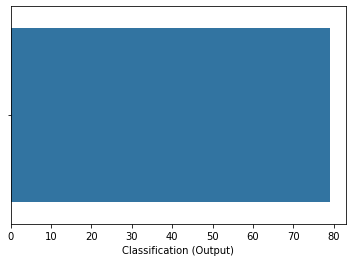

In [71]:
sns.barplot(df1['Classification (Output)'].value_counts())

In [76]:
df1.isnull().sum()

Latitude (X)                0
Longitude (Y)               0
POI_TYPE                    0
Pop_Den                    17
Cam_Present                 0
Tornado Distance            0
Tornado Magnitude           0
Classification (Output)     0
dtype: int64

In [40]:
cols_to_norm = ['Pop_Den','Tornado Distance']
df1[cols_to_norm] = df1[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [41]:
x = df1.iloc[:, :7]
y = df1.iloc[:, 7]

In [42]:
x['Pop_Den'] = x['Pop_Den'].fillna((x['Pop_Den'].mean()))

In [43]:
x['POI_TYPE'] = x['POI_TYPE'].replace('None', (x['POI_TYPE'].mode())[0])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=400, max_iter=200)
model.fit(X_train, Y_train)

predicted_values = model.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model1.append('Logistic_Regression')
print("Logistic_regression's Accuacy is: ", x)

Logistic_regression's Accuacy is:  0.9375


C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
model.score(X_val, Y_val)

0.9333333333333333

In [56]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
predicted_values = neigh.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model1.append('KNN')
print("KNN's Accuacy is: ", x)

KNN's Accuacy is:  0.8125


In [57]:
neigh.score(X_val, Y_val)

1.0

In [58]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(150, 100, 50, 25), random_state=42, learning_rate = 'invscaling')
clf.fit(X_train, Y_train)
predicted_values = clf.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model1.append('MLP_CLASSIFIER')
print("MLP's Accuacy is: ", x)

MLP's Accuacy is:  0.9375


In [59]:
clf.score(X_val, Y_val)

0.6666666666666666

In [60]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='rbf', C=1e3, gamma='auto')
svm_classifier.fit(X_train, Y_train) 

predicted_values = svm_classifier.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model1.append('SVM')
print("SVM's Accuacy is: ", x)

SVM's Accuacy is:  0.9375


In [61]:
svm_classifier.score(X_val, Y_val)

1.0

In [62]:
model.score(X_test, Y_test)

0.9375

In [20]:
model.score(x, y)

0.8354430379746836

In [21]:
df1.shape

(158, 8)

In [22]:
X_train.shape

(127, 7)

In [23]:
X_val.shape

(15, 7)

In [24]:
X_test.shape

(16, 7)

In [25]:
Y_val

43     1
152    0
60     1
107    0
47     1
98     0
26     1
15     1
3      1
6      1
14     1
18     1
65     1
66     1
38     1
Name: Classification (Output), dtype: int64

In [53]:
acc = []
model1 = []

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns


NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,Y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model1.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))
print(confusion_matrix(Y_test,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

[[7 0]
 [0 9]]


In [64]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model1.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [65]:
import XGBClassifier as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,Y_train)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model1.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

ModuleNotFoundError: No module named 'XGBClassifier'

In [ ]:
pip install xgboost

In [72]:
clss= [1,0]
count = [79,79]

<AxesSubplot:title={'center':'Distribuition'}, xlabel='Class', ylabel='Count'>

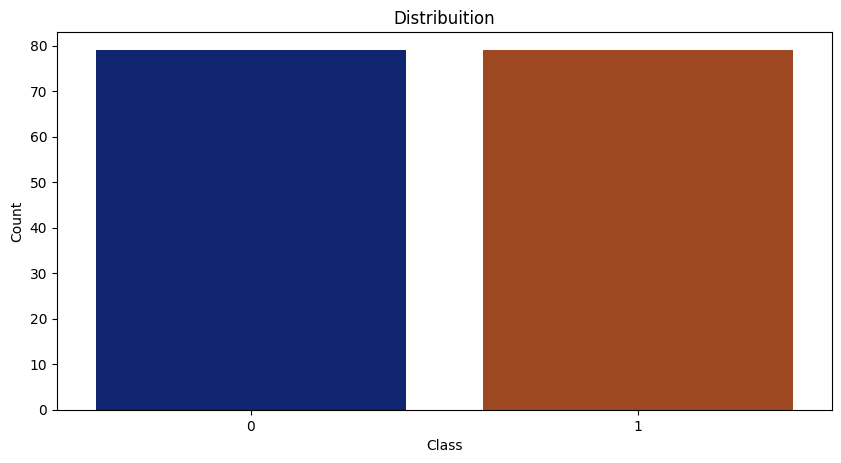

In [73]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Distribuition')
plt.xlabel('Class')
plt.ylabel('Count')
sns.barplot(x = clss,y = count,palette='dark')

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

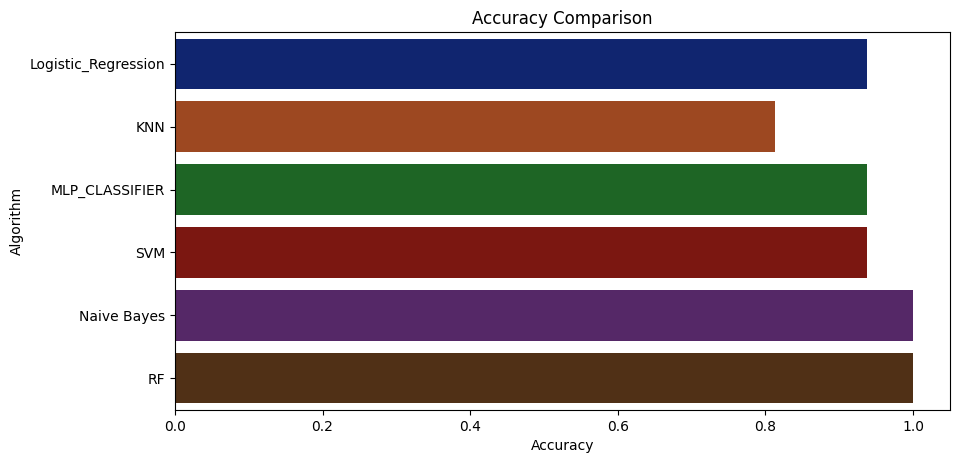

In [67]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model1,palette='dark')

C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


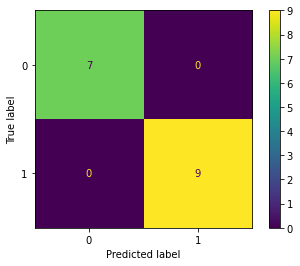

In [69]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF, X_test, Y_test)